In [1]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import time

import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

In [2]:
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

W0214 09:08:50.279152 140421447853888 deprecation.py:323] From <ipython-input-2-a839aeb82f4b>:1: read_data_sets (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
W0214 09:08:50.280462 140421447853888 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:260: maybe_download (from tensorflow.contrib.learn.python.learn.datasets.base) is deprecated and will be removed in a future version.
Instructions for updating:
Please write your own downloading logic.
W0214 09:08:50.281656 140421447853888 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:262: extract_images (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instruction

Extracting MNIST_data/train-images-idx3-ubyte.gz


W0214 09:08:50.546948 140421447853888 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:267: extract_labels (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use tf.data to implement this functionality.
W0214 09:08:50.549226 140421447853888 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:110: dense_to_one_hot (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use tf.one_hot on tensors.
W0214 09:08:50.599561 140421447853888 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:290: DataSet.__init__ (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be remove

Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


## MNIST

- Every MNIST data point has two parts: an image of a handwritten digit and a corresponding label. We'll call the images "x" and the labels "y". Both the training set and test set contain images and their corresponding labels; for example the training images are mnist.train.images and the training labels are mnist.train.labels.
- mnist.train.images is a tensor (an n-dimensional array) with a shape of [55000, 784]. The first dimension is an index into the list of images and the second dimension is the index for each pixel in each image. Each entry in the tensor is a pixel intensity between 0 and 1, for a particular pixel in a particular image.

In [3]:
print("number of data points : ", mnist.train.images.shape[0],"number of pixels in each image :",mnist.train.images.shape[1])

number of data points :  55000 number of pixels in each image : 784


- we're going to want our class-labels as "one-hot vectors". A one-hot vector is a vector which is 0 in most dimensions, and 1 in a single dimension. In this case, the t-th digit will be represented as a vector which is 1 in the t-th dimension. For example, 3 would be [0,0,0,1,0,0,0,0,0,0]. Consequently, mnist.train.labels is a [55000, 10] array of floats.

In [4]:
print("number of data points : ", mnist.train.labels.shape[0],
      " length of the one hot encoded label vector :",mnist.train.labels.shape[1])

number of data points :  55000  length of the one hot encoded label vector : 10


In [5]:
print("number of data points : ", mnist.test.labels.shape[0],
      " length of the one hot encoded label vector :",mnist.test.labels.shape[1])

number of data points :  10000  length of the one hot encoded label vector : 10


- If you want to assign probabilities to an object being one of several different things, softmax (Multiclass Logistic regression) is the thing to do, because softmax gives us a list of values between 0 and 1 that add up to 1. Even later on, when we train more sophisticated models, the final step will be a layer of softmax.

- A softmax regression has two steps: first we add up the evidence of our input being in certain classes, and then we convert that evidence into probabilities.

## Placeholder and Variables

In [6]:
tf.Variable(tf.zeros([2, 2])).shape

TensorShape([Dimension(2), Dimension(2)])

Weight (W) is weight variable which get multiplied with X. The single datapoint in x_i gets multiplited by (w_i), similarly all the 784 features gets multplied with W. Hence the final dimension for W would be (784, 10), where 784 is the number of features for x_i datapoint.

In [7]:
x = tf.placeholder(tf.float32, [None, 784])
# Weights
W = tf.Variable(tf.zeros([784, 10]))
# Bias
b = tf.Variable(tf.zeros([10]))

In [8]:
# Predicted Y labels
y_pred = tf.nn.softmax(tf.matmul(x, W) + b)

# Actual Y labels
# Y is 10 dimension array representing 10 digits
y_true = tf.placeholder(tf.float32, [None, 10]) 

# Defining cross entropy loss
cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_true*tf.log(y_pred), 
                                              reduction_indices=[1]))

In [9]:
# Defining the optimizer for gradient descent
train_optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.05).minimize(loss=cross_entropy)

In [10]:
# Until now everything we defined has not been started or taken into memory
# We need to tell tensorflow that we're begining the training process
session = tf.InteractiveSession()

In [11]:
# We first have to create an operation to initialize the variables we created
tf.global_variables_initializer().run()

In [12]:
# Performing mini-batch gradient descent
for i in range(1000):
    batch_x, batch_y = mnist.train.next_batch(100)
    session.run(train_optimizer, feed_dict={x: batch_x,
                                           y_true: batch_y})

In [13]:
correct_predictions = tf.equal(tf.math.argmax(y_pred, 1),
                               tf.math.argmax(y_true, 1))

accuracy = tf.reduce_mean(tf.cast(correct_predictions, tf.float32))

In [14]:
session.run(accuracy, feed_dict={x:mnist.test.images, 
                                 y_true: mnist.test.labels})

0.9015

In [15]:
def plt_dynamic(x, y, y_1, ax, colors=['b']):
    ax.plot(x, y, 'b', label="Train Loss")
    ax.plot(x, y_1, 'r', label="Test Loss")
    if len(x)==1:
        plt.legend()
    fig.canvas.draw()

W0214 09:08:54.016023 140421447853888 deprecation.py:323] From <ipython-input-16-f75a055ce2ce>:5: softmax_cross_entropy_with_logits (from tensorflow.python.ops.nn_ops) is deprecated and will be removed in a future version.
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



Accuracy: 0.9151


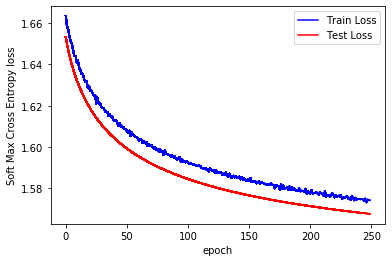

In [16]:
# summarizing everything in single cell
training_epochs = 250
batch_size = 1000
display_step = 1
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = y_pred, labels = y_true))
train_step = tf.train.GradientDescentOptimizer(0.05).minimize(cross_entropy)

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Soft Max Cross Entropy loss')
xs, ytrs, ytes = [], [], []
for epoch in range(training_epochs):
        train_avg_cost = 0.
        test_avg_cost = 0.
        total_batch = int(mnist.train.num_examples/batch_size)
        # Loop over all batches
        for i in range(total_batch):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            _, c = session.run([train_step, cross_entropy], feed_dict={x: batch_xs, y_true: batch_ys})
            train_avg_cost += c / total_batch
            c = session.run(cross_entropy, feed_dict={x: mnist.test.images, y_true: mnist.test.labels})
            test_avg_cost += c / total_batch

        xs.append(epoch)
        ytrs.append(train_avg_cost)
        ytes.append(test_avg_cost)
        plt_dynamic(xs, ytrs, ytes, ax)
        

plt_dynamic(xs, ytrs, ytes, ax)
correct_prediction = tf.equal(tf.argmax(y_pred,1), tf.argmax(y_true,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print("Accuracy:", accuracy.eval({x: mnist.test.images, y_true: mnist.test.labels}))